<a href="https://colab.research.google.com/github/bokutachi256/gisday2015/blob/master/makeflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# osgeoやpyshedsあたりを使ったDEM処理プログラム

## 使用データ'06_miyake_dem.tif'の諸元
* CRS epsg:2451：座標系はJGD2000の第9系（epsg: 2451）
* ncols 10000：東西方向のセル数
* nrows 10500：南北方向のセル数
* xllcorner -34000：左下セルのx座標（単位は座標系の単位）
* yllcorner -217500：左下セルのy座標（単位は座標系の単位）
* cellsize 1：セルサイズ（単位は座標系の単位）
* NODATA_value  -9999：NoDataの値


## pyshedsとosgeoを使って流路網を作成する

+ osgeo: ラスタ・ベクタデータを扱うためのライブラリ
+ pysheds: DEM上の流路網関係の処理を行うライブラリ．Google Colabには入っていないので，マジックコマンドでpipを使ってインストールする必要がある．

## pyshedsのインストール

pyehsedsは標準ではcolaboratoryに用意されていないので，
マジックコマンドでpipを使ってインストールする必要がある．
この作業はpyshedsをimportする前に行わなければならない．

In [0]:
%pip install pysheds

## ライブラリのインポート

* cv2：画像処理ライブラリOpenCV
* numpy：行列計算ライブラリ
* seaborn：図をきれいに表示するライブラリ
* matplotlib：図化用ライブラリ
* google.colab：Google ColaboratoryにGoogle driveをマウントするライブラリ
* tqdm：プログレスバーを表示するライブラリ
* osgeo：GISのラスタ・ベクタ型データを扱うライブラリ
* pysheds：流路網処理のライブラリ



In [0]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from tqdm import tqdm

from osgeo import gdal, gdalconst, gdal_array
from pysheds.grid import Grid

google driveのマウント

In [0]:
drive.mount('/content/drive')
base_dir = "/content/drive/My Drive/workspace/Miyake_DEM/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


DEM（06_miyake_dem.asc）を Arc/Info ASCII Gridでインポートする．
DEMのバンド数は1個だけなので，GetRasterBandでバンド1のみを読み込み，dataに格納する．

In [0]:
#src = gdal.Open(base_dir + '06_miyake_dem.asc', gdalconst.GA_ReadOnly)
#data = src.GetRasterBand(1).ReadAsArray() # 第１バンド numpy array

#dtid = src.GetRasterBand(1).DataType # 型番号 (ex: 6 -> numpy.float32)
#gdal_array.GDALTypeCodeToNumericTypeCode(dtid) # 型番号 -> 型名 変換

In [0]:
#print(src.RasterXSize) # 水平方向ピクセル数
#print(src.RasterYSize) # 鉛直方向ピクセル数
#print(src.RasterCount) # バンド数
#print(src.GetGeoTransform())
#print(src.GetProjection())

10000
10500
1
(-34000.0, 1.0, 0.0, -207000.0, 0.0, -1.0)



In [0]:
data

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

pyshedsのfrom_rasterを使ってGeoTiff形式のDEMを読み込む

In [0]:
grid = Grid.from_raster(base_dir + '06_miyake_dem.tif', data_name='dem')
data = grid.dem
grid.view('dem')

Raster([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        ...,
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32)

CRSの確認

In [0]:
data.crs.crs

<Bound CRS: PROJCS["JGD2000 / Japan Plane Rectangular CS IX",G ...>
Name: JGD2000 / Japan Plane Rectangular CS IX
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from JGD2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: JGD2000 / Japan Plane Rectangular CS IX

pyshedsを使って流下方向マトリクス(DDM)を作成する

In [0]:
dem=data
grid.fill_depressions('dem', out_name='flooded_dem')
    
# Resolve flats in DEM
grid.resolve_flats('flooded_dem', out_name='inflated_dem')
    
# Specify directional mapping
dirmap = (64, 128, 1, 2, 4, 8, 16, 32)
    
# Compute flow directions
# -------------------------------------
grid.flowdir(data='inflated_dem', out_name='dir', dirmap=dirmap)
grid.view('dir')

Raster([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

DDMの表示

In [0]:
plt.figure(figsize=(30,30))
im = plt.imshow(grid.dir, cmap = 'gist_earth') 

plt.colorbar(im)
plt.show()


DDMからflow accumulation（流域面積）を計算する

In [0]:
grid.accumulation(data='dir', dirmap=dirmap, out_name='acc')
grid.view('acc')

Raster([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]])

流域面積の図化．
[4000:5000, 4000:5000]のみを表示

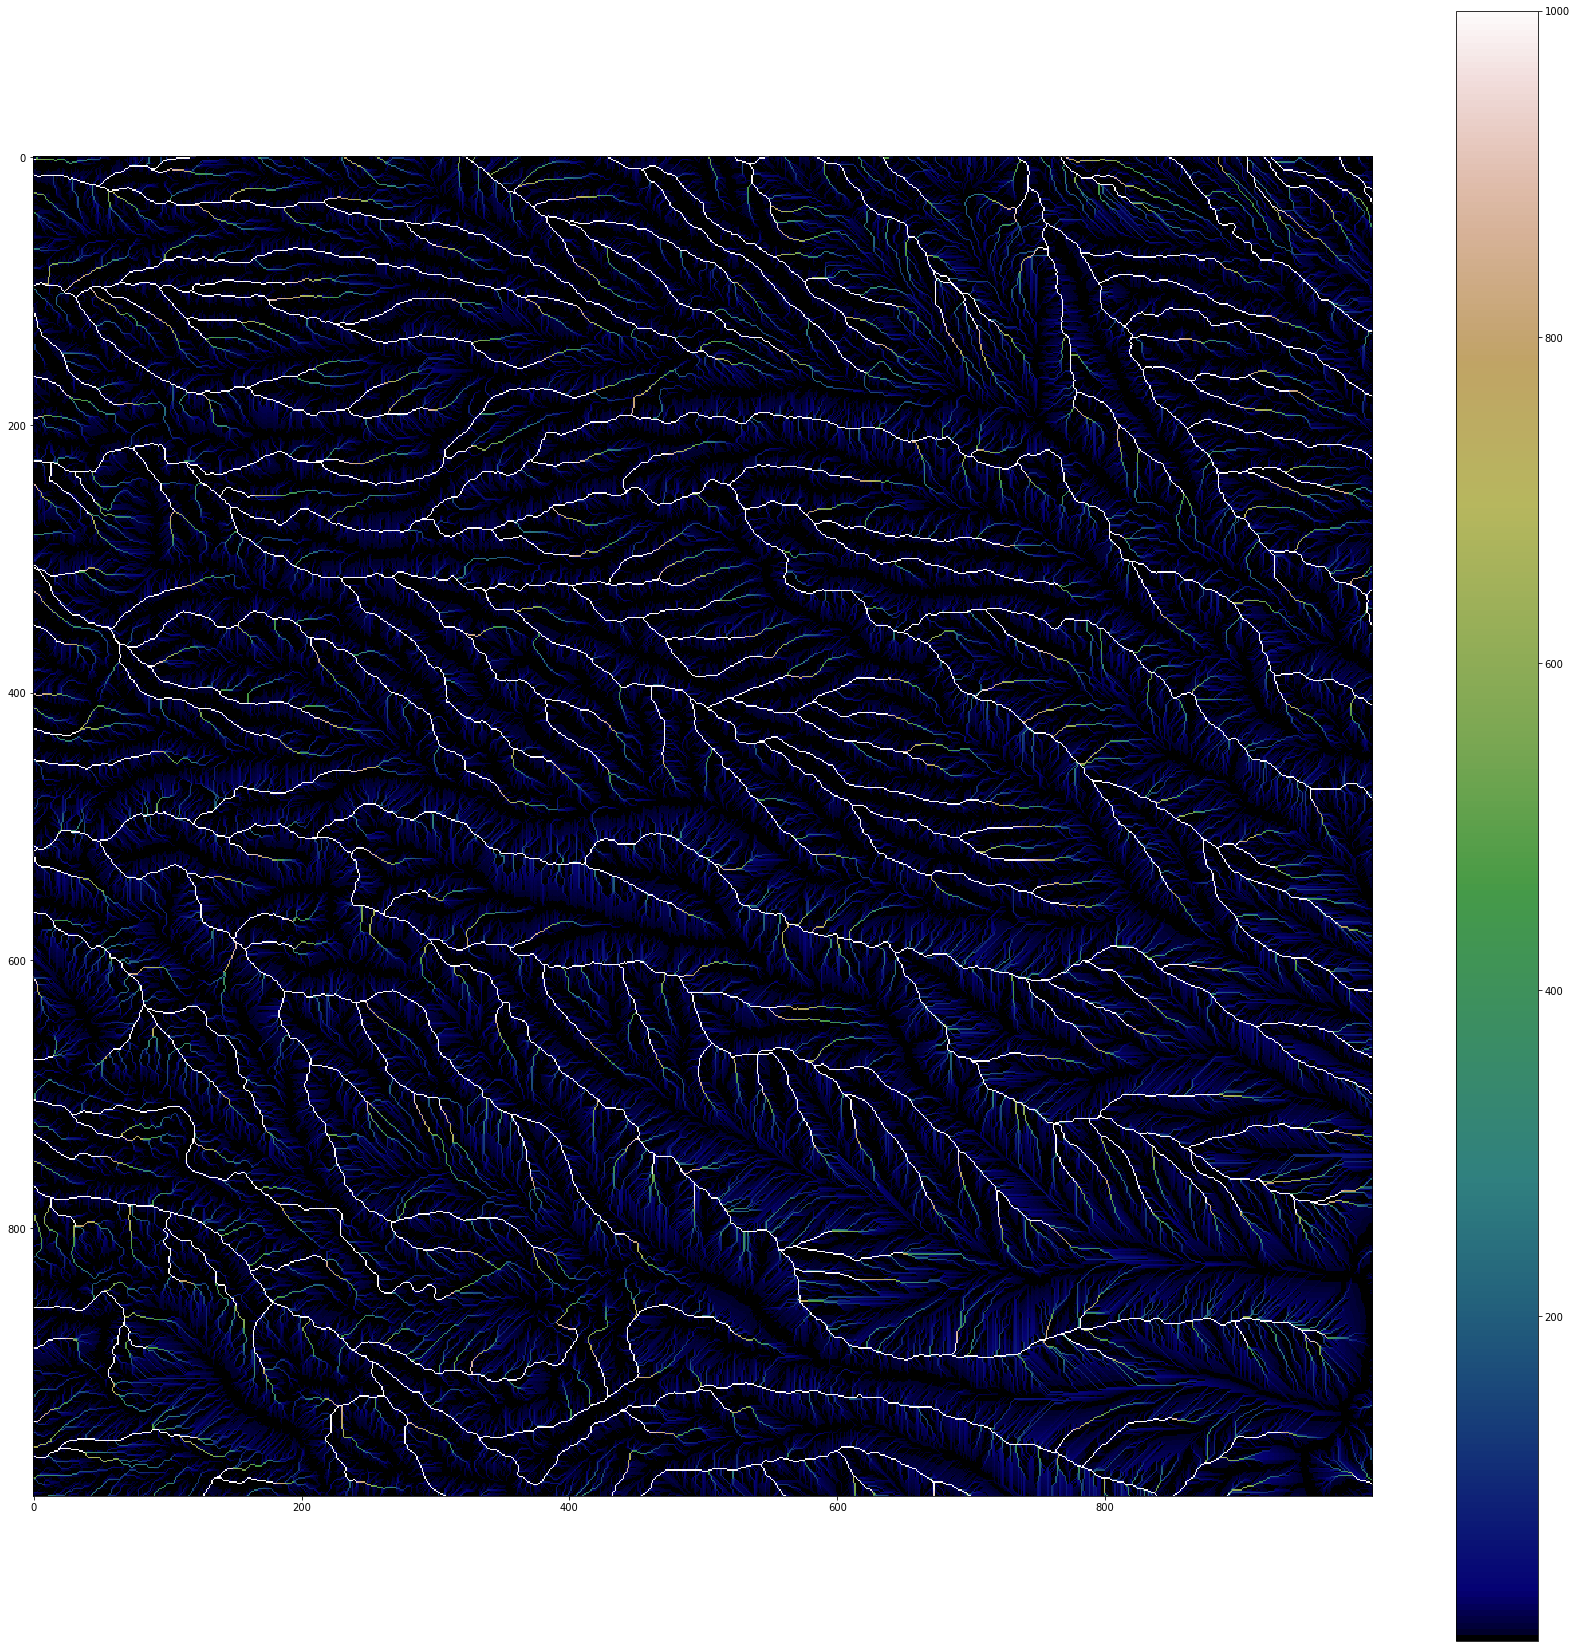

In [0]:
plt.figure(figsize=(30,30))
im = plt.imshow(grid.acc[4000:5000, 4000:5000], cmap = 'gist_earth', vmax=1000) 

plt.colorbar(im)
plt.show()

In [0]:
#grid.flow_distance(data='data', x=x, y=y, dirmap=dirmap, out_name='dist', xytype='label', nodata_out=np.nan)
grid.flow_distance(data='data', dirmap=dirmap, out_name='dist', xytype='label', nodata_out=np.nan)

TypeError: ignored

In [0]:
dem = np.where(data < 0, 0, data)

kernel = np.ones((51, 51), np.float32) / 2601

In [0]:
dst = dem
for i in tqdm(range(50)):
  dst = cv2.filter2D(dst, -1, kernel) 
  dst = np.maximum(dst, dem) 
  

100%|██████████| 50/50 [03:53<00:00,  4.75s/it]


In [0]:
plt.figure(figsize=(10,10))
#im = plt.imshow(dst, cmap='terrain', vmin=0, vmax=700) 
#im = plt.imshow(dst - dem, cmap = 'RdPu', vmin = 0, vmax = 100) 
im = plt.imshow(dst, cmap = 'gist_earth') 

plt.colorbar(im)
#plt.plot(X, Y, 'ow')
#plt.savefig('dem_meiji2_10m_dom1.png')
plt.show()
#plt.close('all')

In [0]:
print(cv2.getBuildInformation())